## Generacion de una anotacion del diagrama extraido por Docling de IBM

 - Todo este codigo ha sido extraido de: https://huggingface.co/microsoft/Florence-2-large/blob/main/sample_inference.ipynb

In [9]:
from transformers import AutoProcessor, AutoModelForCausalLM  
from PIL import Image
import requests
import copy
from pathlib import Path
import torch
%matplotlib inline  

In [ ]:
# Verificacion de la configuracion de GPU
print(torch.cuda.is_available())
print(torch.cuda.device_count())

True
1


### Carga del modelo Florence-2-large

In [26]:
model_id = 'microsoft/Florence-2-large'
model = AutoModelForCausalLM.from_pretrained(model_id, trust_remote_code=True, torch_dtype='auto').eval().cuda()
processor = AutoProcessor.from_pretrained(model_id, trust_remote_code=True)

C:\Users\Usuario\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\timm\models\layers\__init__.py:48: FutureWarning: Importing from timm.models.layers is deprecated, please import via timm.layers
  warnings.warn(f"Importing from {__name__} is deprecated, please import via timm.layers", FutureWarning)


### Funcion para generar la anotacion detallada de la imagen

In [27]:
def Detailed_Annotation(task_prompt:str, image:Image, text_input=None):
    if text_input is None:
        prompt = task_prompt
    else:
        prompt = task_prompt + text_input
    inputs = processor(text=prompt, images=image, return_tensors="pt").to('cuda', torch.float16)
    generated_ids = model.generate(
      input_ids=inputs["input_ids"].cuda(),
      pixel_values=inputs["pixel_values"].cuda(),
      max_new_tokens=1024,
      early_stopping=False,
      do_sample=False,
      num_beams=3,
    )
    generated_text = processor.batch_decode(generated_ids, skip_special_tokens=False)[0]
    parsed_answer = processor.post_process_generation(
        generated_text, 
        task=task_prompt, 
        image_size=(image.width, image.height)
    )

    return parsed_answer

### Generacion Anotacion

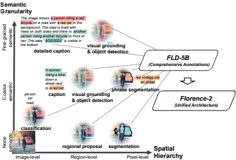

In [28]:
# Carga de la imagen objetivo
image_path = Path(r'../Segmentacion_PDF/Diagrama_Pagina1_Florence2.png')
diagrama_Florence2 = Image.open(image_path)
diagrama_Florence2

In [29]:
# Accion especifica a realizar por el modelo
task_prompt = '<MORE_DETAILED_CAPTION>'

In [ ]:
Detailed_Annotation(task_prompt, diagrama_Florence2)

The image is a flowchart that shows the relationship between semantic granularity and spatial hierarchy. The flowchart is divided into two sections, FLD-58 and Florence-2, which are the two types of spatial hierarchy in the United States.

The flowchart has a title that reads "Semantic Granularity" at the top, followed by a description of the semantic granularity. Below the description, there is a description that explains the concept of visual grounding and object detection. The description explains that visual grounding is a process where the object detection is used to detect and analyze the presence of objects in a specific area of the image. The image is represented by a red square with a blue arrow pointing to it, indicating that it is a visual representation of the object. 

There are also several smaller images scattered throughout the flowchart, which represent different aspects of the spatial hierarchy, such as the location of the objects in the image, the region-level, and t